# Multiple Linear Regression
Shared Bikes Demand Prediction - Assignment Solution
Problem Statement:
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
So interpretation is important!

The solution is divided into the following sections:

Data understanding and exploration
Data Visualisation
Data preparation
Model building and evaluation
1. Data Understanding and Exploration
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [ ]:
###Step 1: Reading and Understanding the Data
###Let us first import NumPy and Pandas and read the bikesharing dataset

In [559]:
import warnings
warnings.filterwarnings('ignore')

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [561]:
# Read the data from csv file

df = pd.read_csv("E:/Machine Learning/data set/day.csv")

In [562]:
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [563]:
df.shape


(730, 16)

In [564]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [566]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

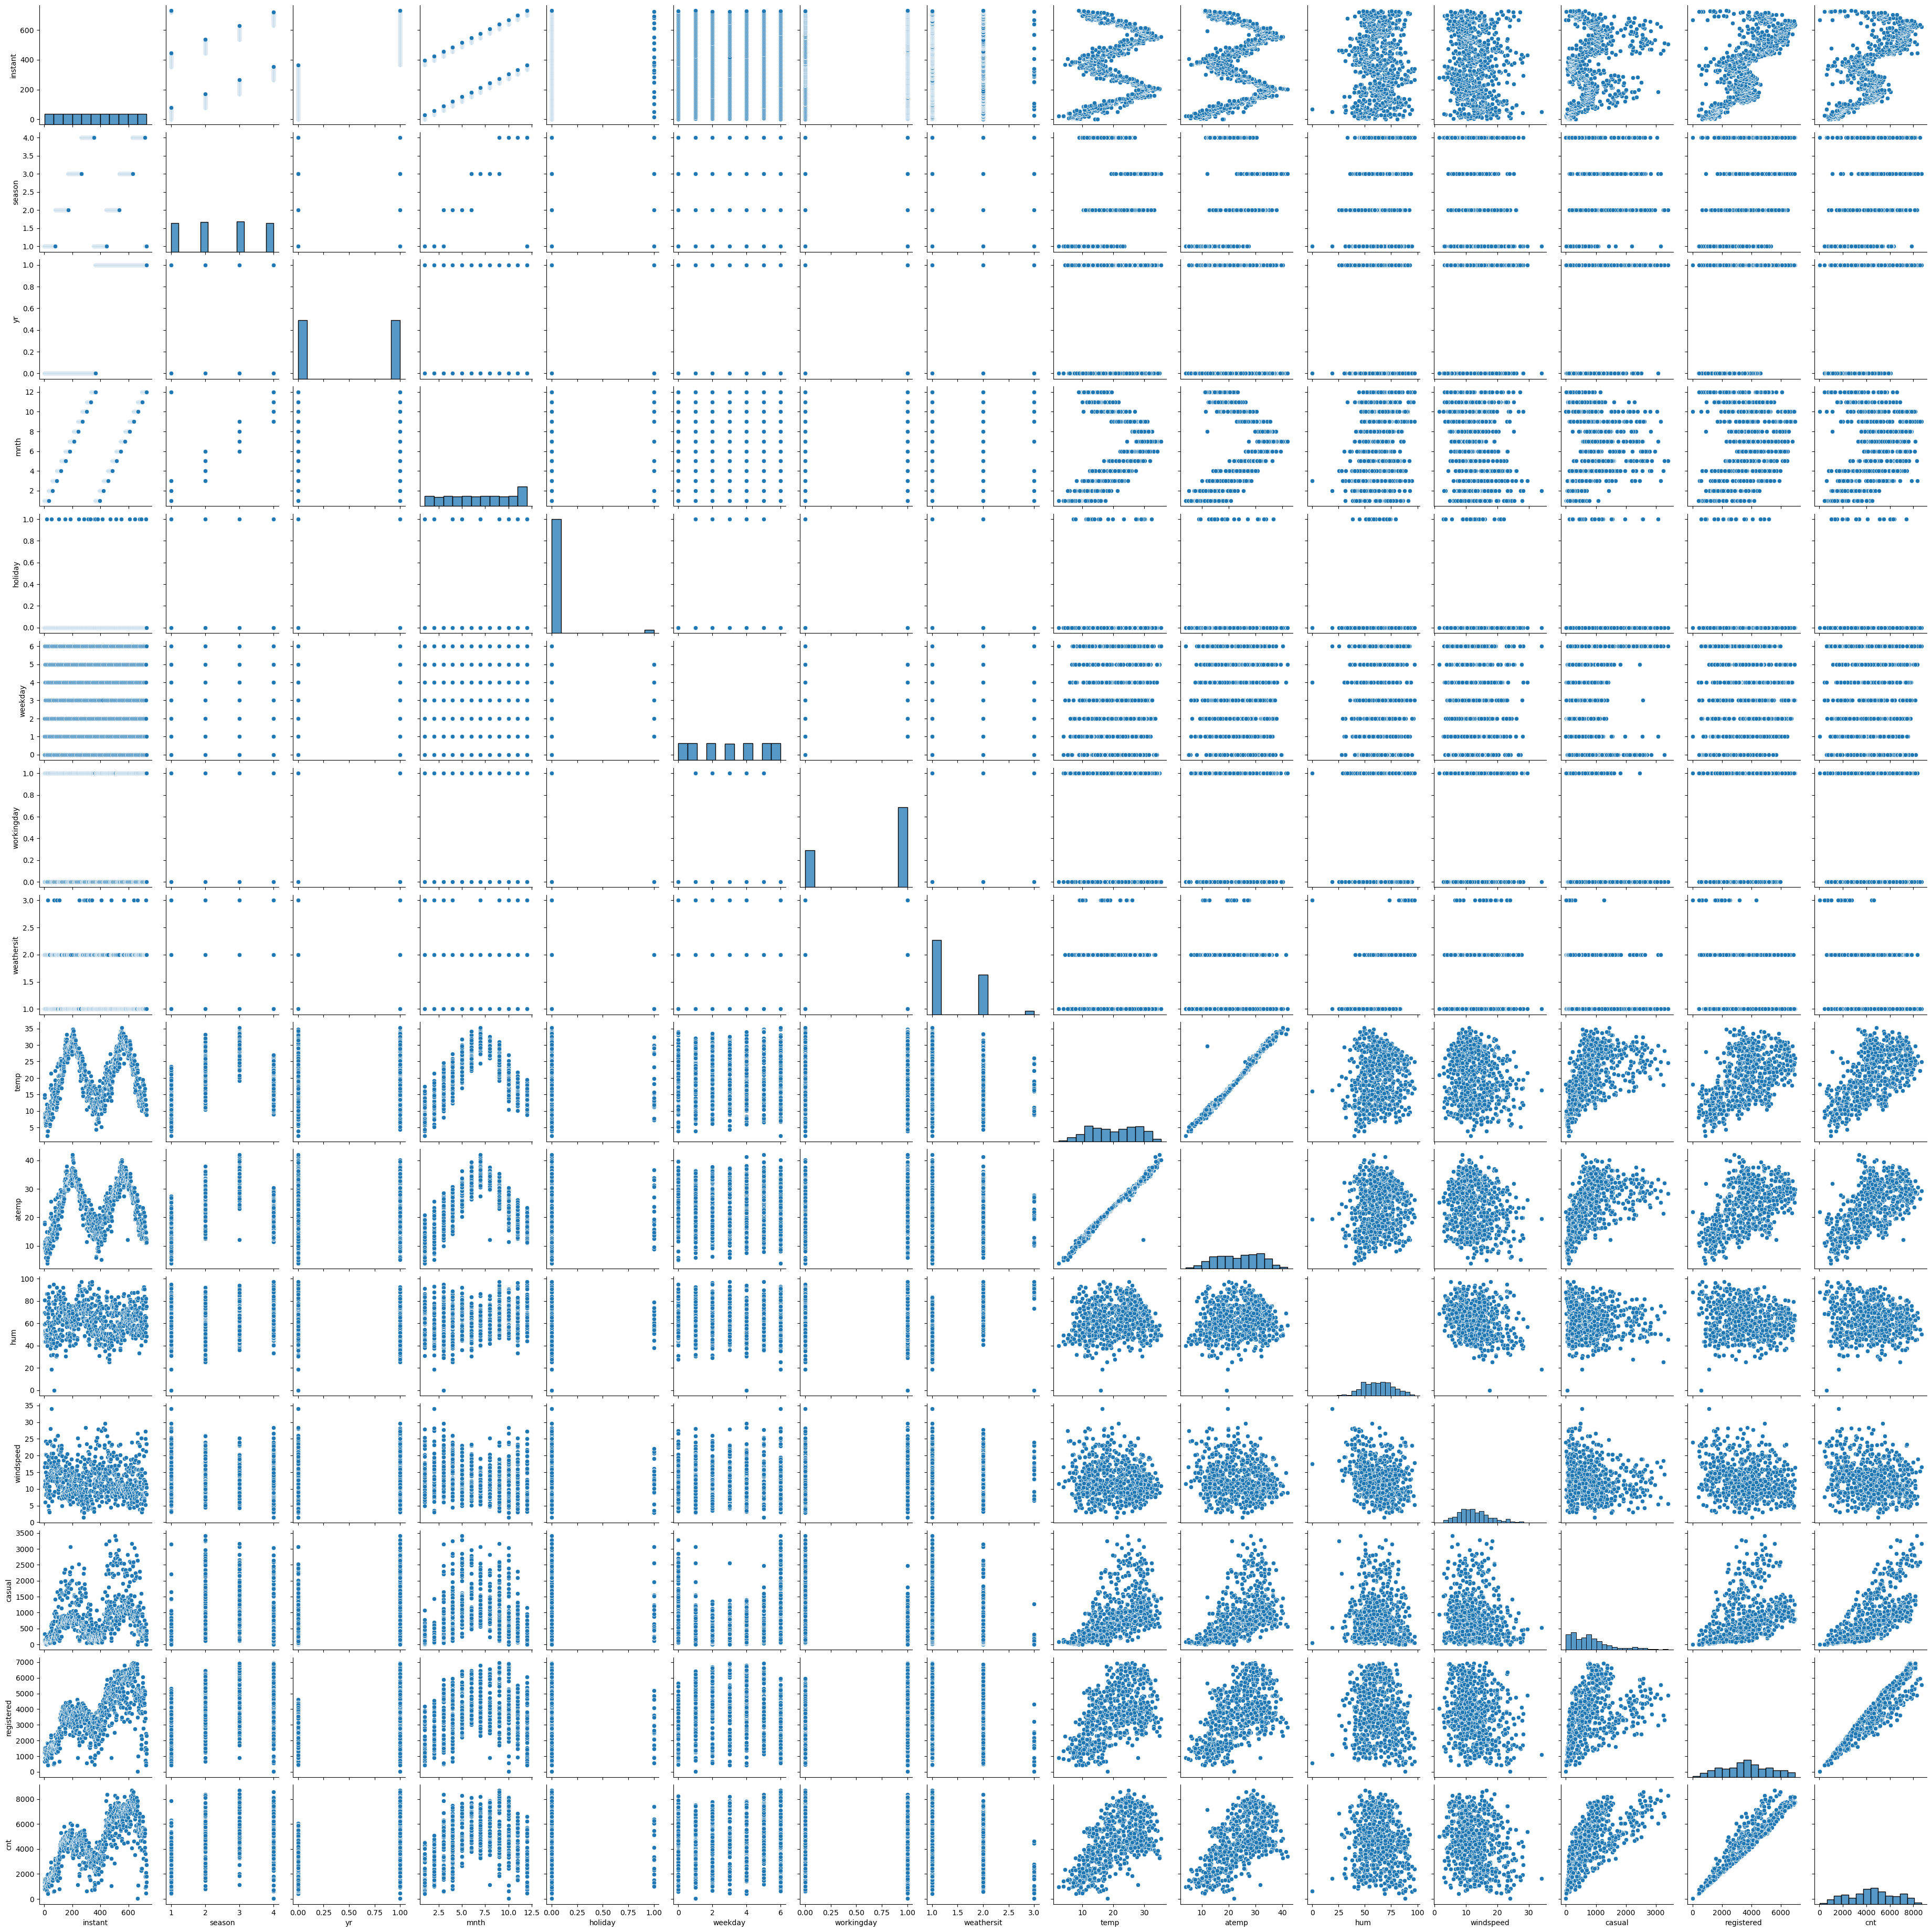

In [567]:
#visualizing
sns.pairplot(df)
plt.show()

In [568]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [569]:
# Checking for the duplicates
df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

In [570]:
df.size

11680

In [571]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [572]:
###As the shape is same after dropping duplicates, that means there are no duplicates in the original dataframe as well.

In [573]:
#separate numeric and categorical variables
#numeric_data
df.select_dtypes(include=[np.number])

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0          1       1   0     1        0        6           0           2   
1          2       1   0     1        0        0           0           2   
2          3       1   0     1        0        1           1           1   
3          4       1   0     1        0        2           1           1   
4          5       1   0     1        0        3           1           1   
..       ...     ...  ..   ...      ...      ...         ...         ...   
725      726       1   1    12        0        4           1           2   
726      727       1   1    12        0        5           1           2   
727      728       1   1    12        0        6           0           2   
728      729       1   1    12        0        0           0           1   
729      730       1   1    12        0        1           1           2   

          temp     atemp      hum  windspeed  casual  registered   cnt  
0    14.110847  18.18125  80.5833  10.749882     331         654   985  
1    14.902598  17.68695  69.6087  16.652113     131         670   801  
2     8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3     8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4     9.305237  11.46350  43.6957  12.522300      82        1518  1600  
..         ...       ...      ...        ...     ...         ...   ...  
725  10.420847  11.33210  65.2917  23.458911     247        1867  2114  
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095  
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341  
728  10.489153  11.58500  48.3333  23.500518     364        1432  1796  
729   8.849153  11.17435  57.7500  10.374682     439        2290  2729  

[730 rows x 15 columns]

In [574]:
#categorical_data
df.select_dtypes(exclude=[np.number])

dteday
0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
..          ...
725  27-12-2019
726  28-12-2019
727  29-12-2019
728  30-12-2019
729  31-12-2019

[730 rows x 1 columns]

In [575]:
# dropping the unwanted columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [576]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [577]:
#convert some numerical data to categorical data
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [578]:
# Encoding/mapping the month column
import calendar
df['mnth']=df['mnth'].apply(lambda x:calendar.month_abbr[x])
df['mnth'].unique()
#df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [579]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [580]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [581]:
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     sat           0      Misty  14.110847   
1  spring   0  Jan        0     sun           0      Misty  14.902598   
2  spring   0  Jan        0     mon           1      Clear   8.050924   
3  spring   0  Jan        0     tue           1      Clear   8.200000   
4  spring   0  Jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

### Step2 Visualizing data
### Univariant analysis###
Let's now spend some time doing what is arguably the most important step - understanding the data.

Understanding the distribution of various numeric variables
If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

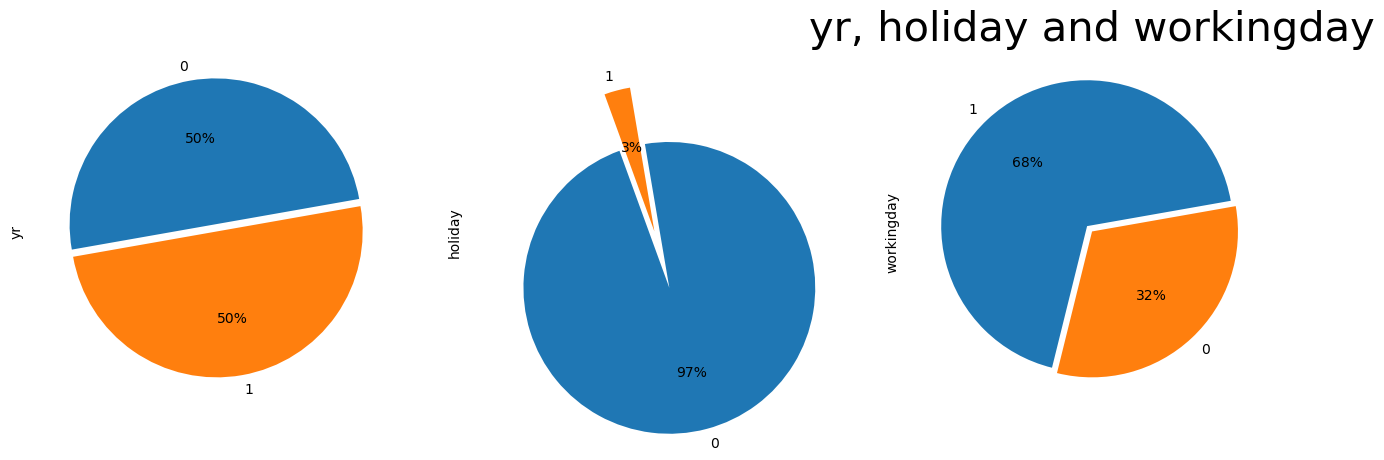

In [582]:
plt.figure(figsize = [16,15])
plt.subplot(131)
df['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
df['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
df['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and workingday',fontsize=30)
plt.show()

By observing the 3 pi charts we can came to conclusion that 
    - 'Yr' is expected to be 50%-50% daily records of bike usage. 
    - Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0. 
    - The same case applies to 'workingday' due to higher number of days vs non-working days.

In [583]:
###categorical variables

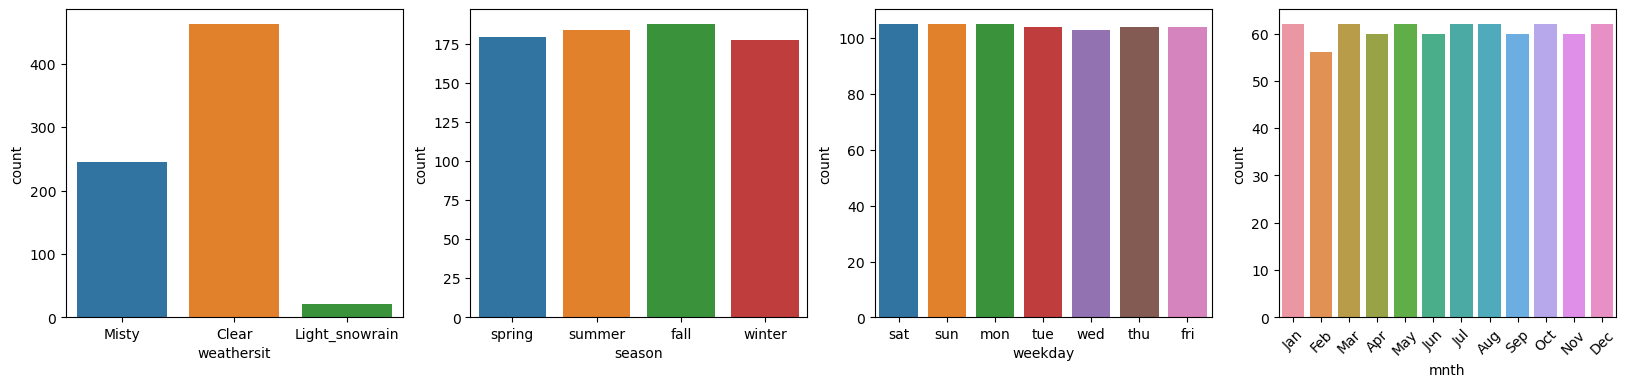

In [584]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = df, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df, x = 'season')
plt.subplot(143)
sns.countplot(data = df, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'mnth')
plt.show()

* By observing the plots we can came to conclusion that
    - When 'weathersit' is Clear, Few clouds, Partly cloudy, Partly cloudy the bikes are usage are more. 
    - The rest of the variables are shows very close values.

###Bivariant analysis
#numeric values

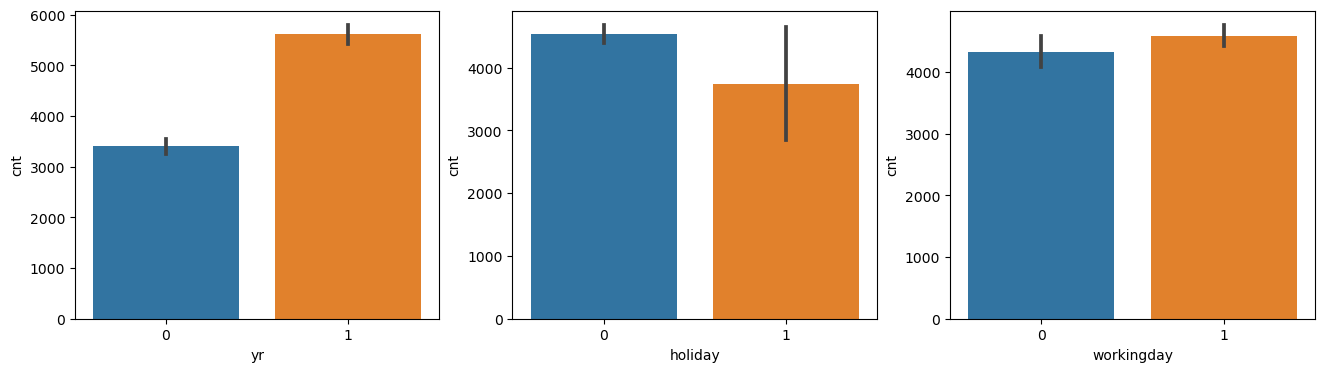

In [585]:
plt.figure(figsize = [16,4])
plt.subplot(131)
sns.barplot(x='yr',y='cnt', data = df )
plt.subplot(132)
sns.barplot(x='holiday',y='cnt', data = df)
plt.subplot(133)
sns.barplot(x='workingday',y='cnt', data = df)
plt.show()

* By observing the plots we can came to conclusion that
    - There is a increase in number of bike users from year 2018(0) to year 2019(1).
    - There are more users during holidays(0) as compared to Non holidays(1).
    - There is a very little discrepancy between users of BoomBike on a working day(1) and non-working day(0).

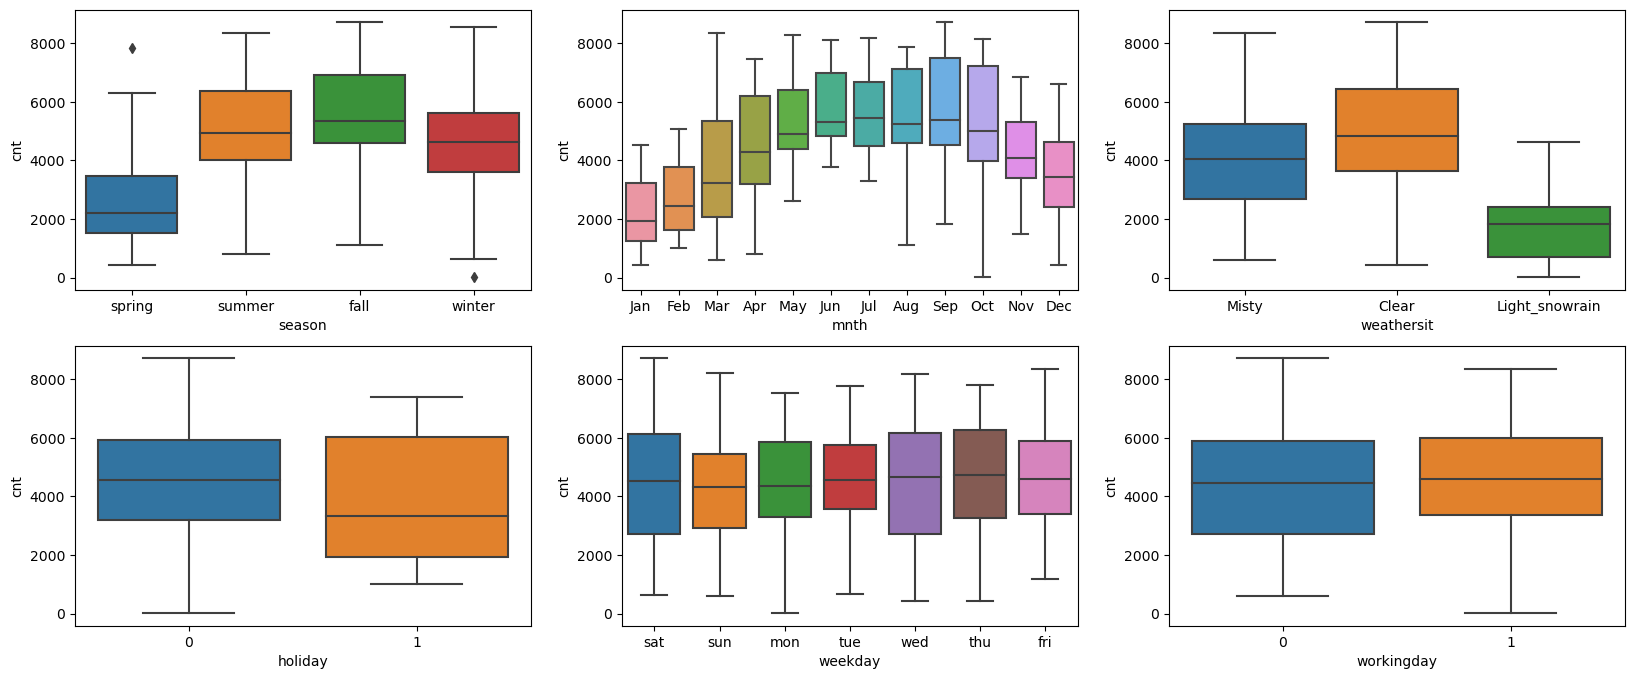

In [586]:
#categorical variables
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

In [587]:
##Insights 
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’).

The inference that We could derive were:

season: Almost 32% of the bike booking were happening in season3(fall) with a median of over 5000 booking (for the period of 2 years). 
    This was followed by season2(summer) & season4(winter)with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month.
      This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). 
    This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. 
    This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. 
    This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years).
    This indicates, workingday can be a good predictor for the dependent variable.

SyntaxError: invalid syntax (2509210716.py, line 2)

In [ ]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

In [ ]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

Here is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity.
We will decide which parameters to keep based on VIF and p-value w.r.t other variables


In [588]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [589]:
df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     sat           0      Misty  14.110847   
1  spring   0  Jan        0     sun           0      Misty  14.902598   
2  spring   0  Jan        0     mon           1      Clear   8.050924   
3  spring   0  Jan        0     tue           1      Clear   8.200000   
4  spring   0  Jan        0     wed           1      Clear   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [590]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [591]:
df_new.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  Jan        0     sat           0      Misty  14.110847   
1  spring   0  Jan        0     sun           0      Misty  14.902598   
2  spring   0  Jan        0     mon           1      Clear   8.050924   
3  spring   0  Jan        0     tue           1      Clear   8.200000   
4  spring   0  Jan        0     wed           1      Clear   9.305237   

      atemp      hum  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125  80.5833  ...    1    0    0    0    0               0      1   
1  17.68695  69.6087  ...    0    1    0    0    0               0      1   
2   9.47025  43.7273  ...    0    0    0    0    0               0      0   
3  10.60610  59.0435  ...    0    0    0    1    0               0      0   
4  11.46350  43.6957  ...    0    0    0    0    1               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [592]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  Jul             730 non-null    uint8  
 17  Jun             730 non-null    uin

In [593]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [594]:
# check the head of new dataframe

df_new.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Aug  Dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
0    0    0  ...    1    0    0    0    0               0      1       1   
1    0    0  ...    0    1    0    0    0               0      1       1   
2    0    0  ...    0    0    0    0    0               0      0       1   
3    0    0  ...    0    0    0    1    0               0      0       1   
4    0    0  ...    0    0    0    0    1               0      0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 30 columns]

Step 4: Splitting the Data into Training and Testing Sets

In [595]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [596]:
# verifying the head of dataset before scaling.

df_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   
728   1        0           0  10.489153  11.5850  48.3333  23.500518  1796   
482   1        0           0  15.443347  18.8752  48.9583   8.708325  4220   
111   0        0           1  13.803347  16.0977  72.9583  14.707907  1683   

     Aug  Dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
576    0    0  ...    0    0    0    1    0               0      0       0   
426    0    0  ...    1    0    0    0    0               0      1       1   
728    0    1  ...    0    1    0    0    0               0      0       1   
482    0    0  ...    1    0    0    0    0               0      1       0   
111    0    0  ...    0    0    0    0    0               0      1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 30 columns]

In [597]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [598]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [599]:
# verifying the head after appying scaling.

df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

          cnt  Aug  Dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
576  0.827658    0    0  ...    0    0    0    1    0               0      0   
426  0.465255    0    0  ...    1    0    0    0    0               0      1   
728  0.204096    0    1  ...    0    1    0    0    0               0      0   
482  0.482973    0    0  ...    1    0    0    0    0               0      1   
111  0.191095    0    0  ...    0    0    0    0    0               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 30 columns]

In [600]:
# describing the dataset

df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         Aug         Dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.154902   
std      0.169803    0.224421    0.294988    0.278131  ...    0.362166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.143137    0.133333    0.131373    0.158824        0.029412   
std      0.350557    0.340268    0.338139    0.365870        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

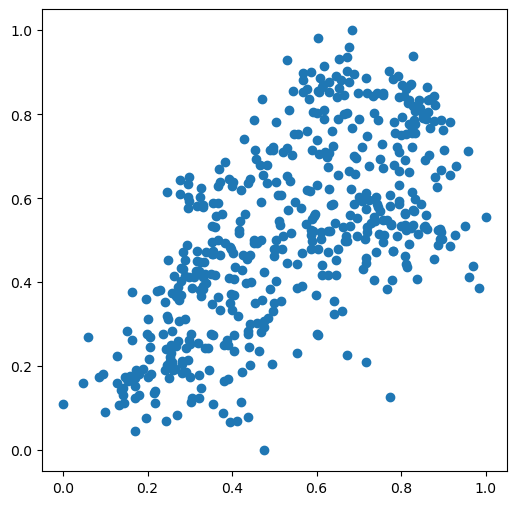

In [601]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

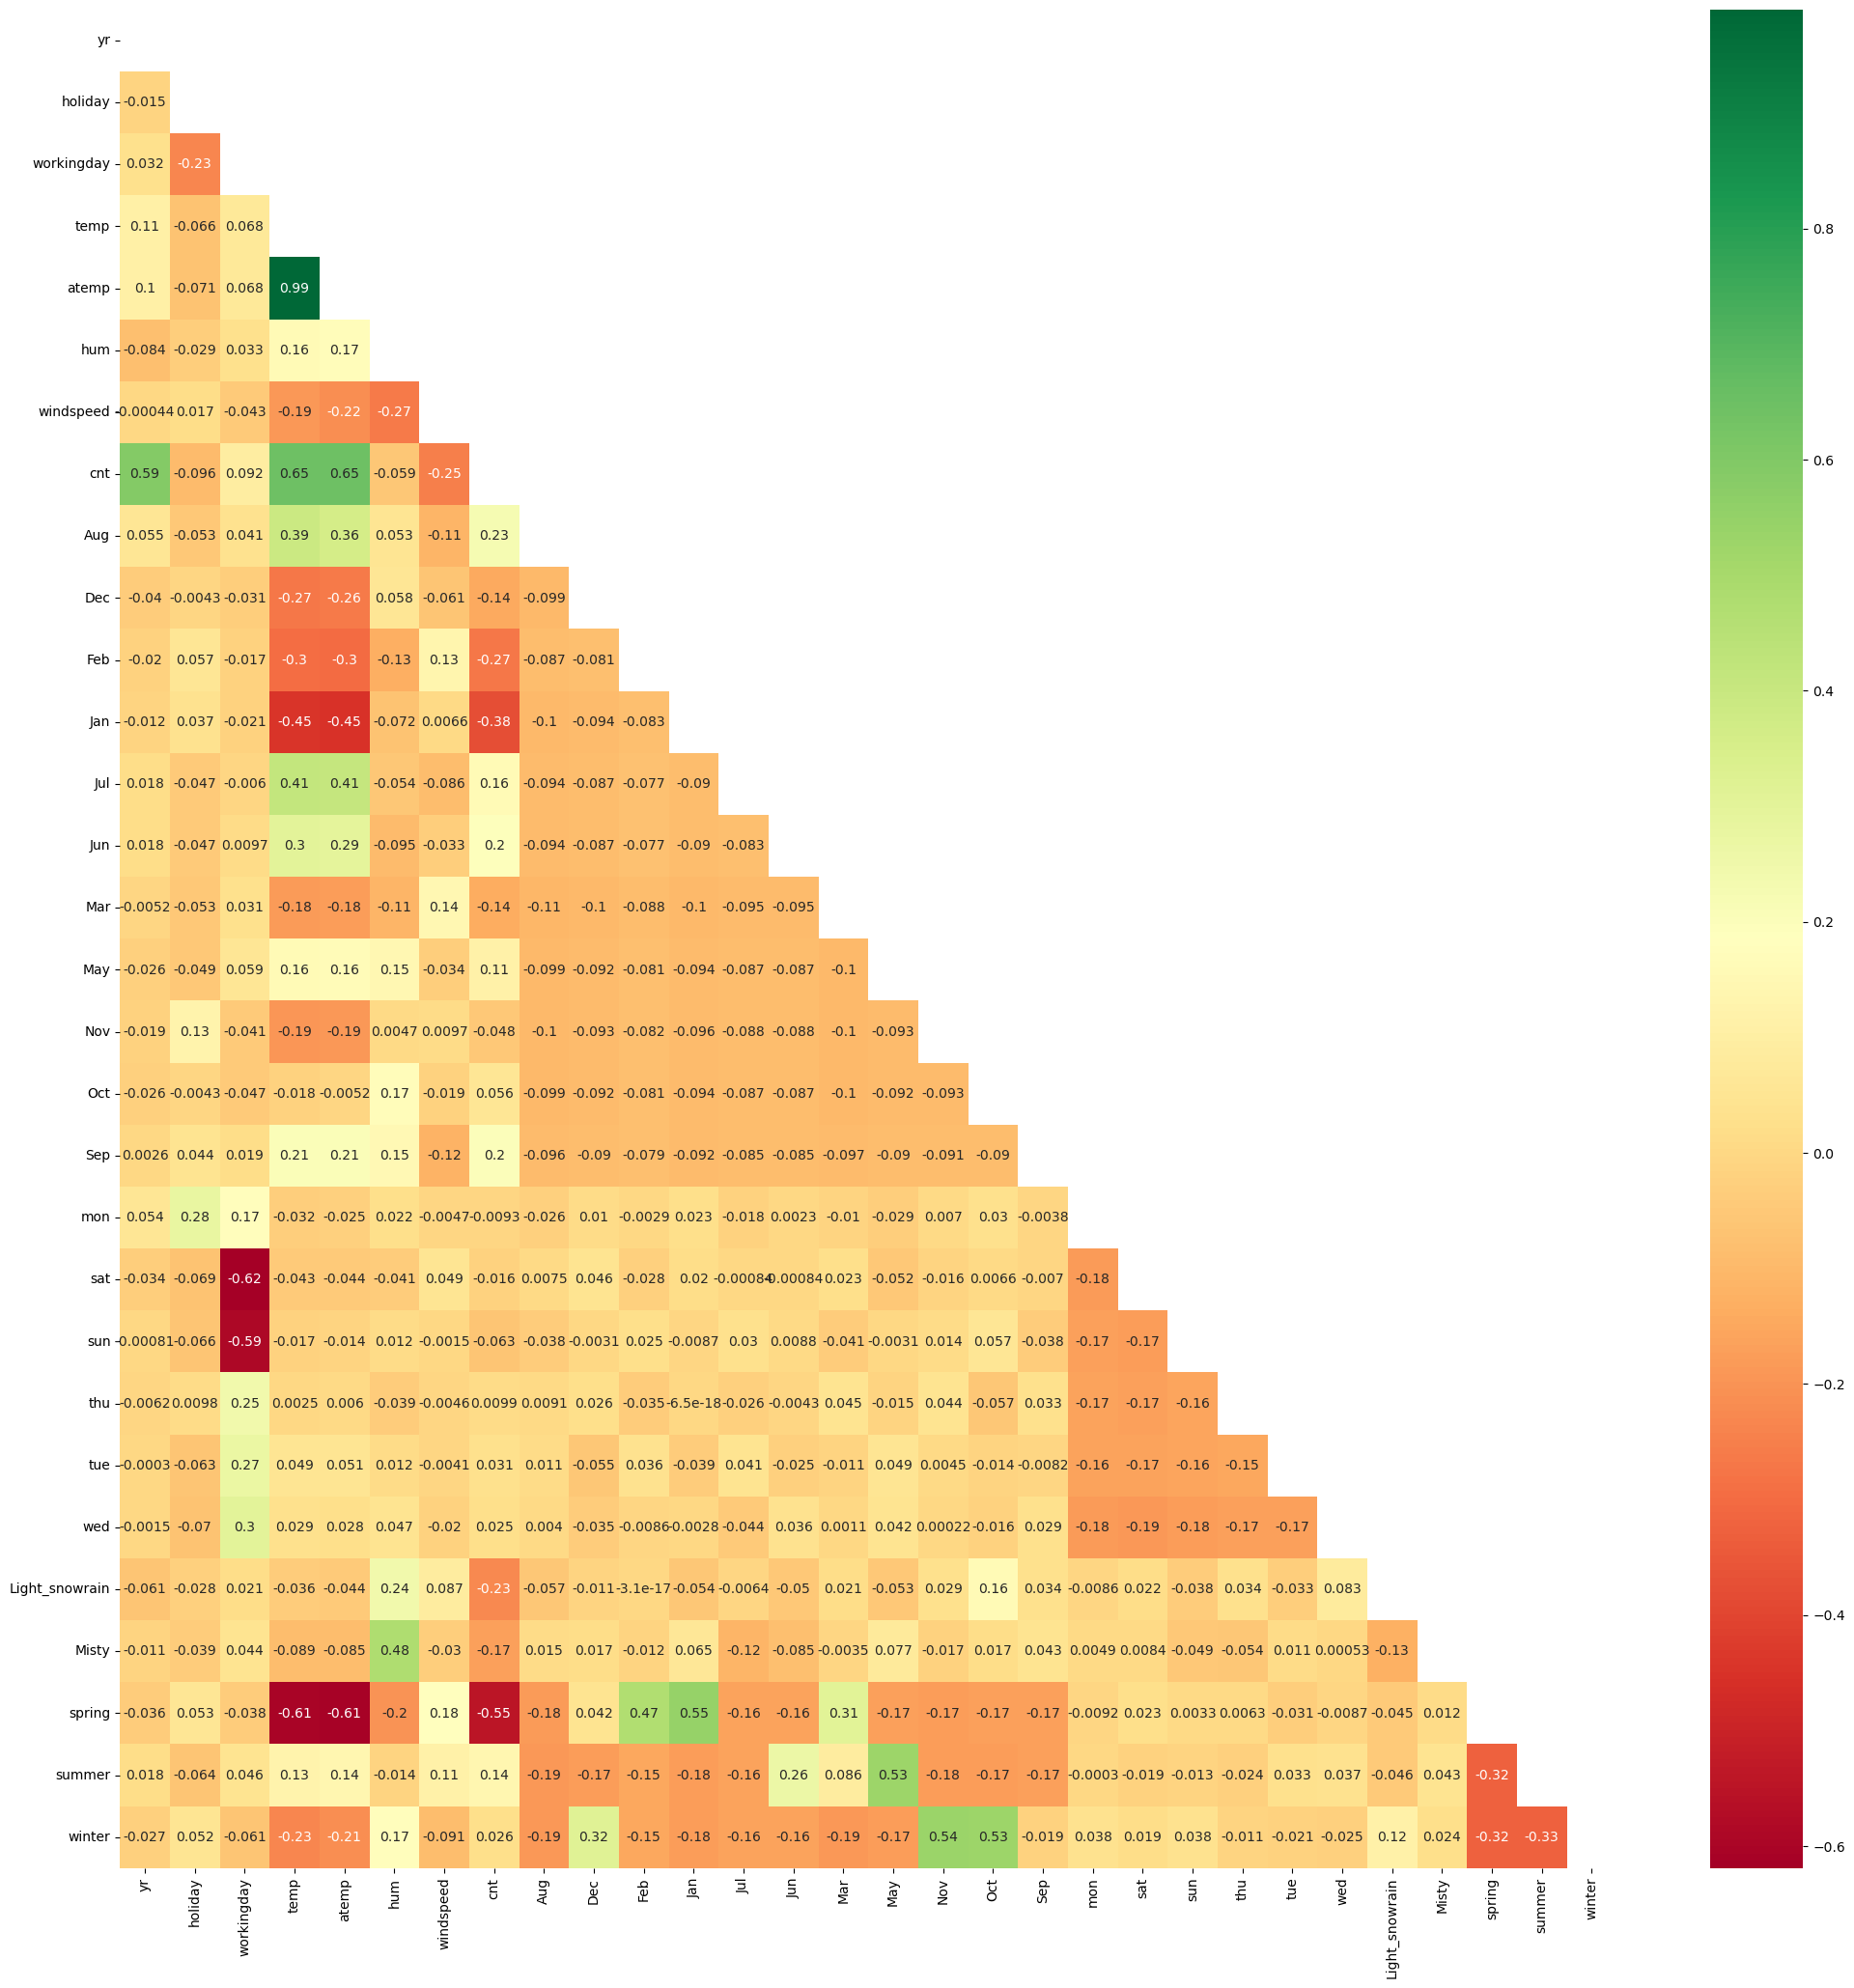

In [602]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:

Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:

Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.
Thus, while building the model, we'll have to pay attention to multicollinearity.
Visualization confirms the positive correlation between temp and cnt.

In [603]:
#removing atemp as it is highly correlated with temp
df.drop('atemp',axis=1,inplace=True) 

# 3. Data Preparation
Data Preparation
Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation.
They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [604]:
# Building the Linear Model
y_train = df_train.pop('cnt')
X_train = df_train
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [605]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [606]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select= 15,step=1)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True False False False  True  True
 False False False False False  True False  True False False False False
  True  True  True  True  True]
[ 1  1  1  1  5  1  1  7  3  4  1  1 14 15  6  2 13  1  9  1  8 11 10 12
  1  1  1  1  1]


In [607]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [608]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [609]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [610]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

const  yr  holiday  workingday      temp       hum  windspeed  Jan  Jul  \
576    1.0   1        0           1  0.815169  0.725633   0.264686    0    1   
426    1.0   1        0           0  0.442393  0.640189   0.255342    0    0   
728    1.0   1        0           0  0.245101  0.498067   0.663106    0    0   
482    1.0   1        0           0  0.395666  0.504508   0.188475    0    0   
111    1.0   0        0           1  0.345824  0.751824   0.380981    0    0   

     Sep  sat  Light_snowrain  Misty  spring  summer  winter  
576    0    0               0      0       0       0       0  
426    0    1               0      1       1       0       0  
728    0    0               0      0       1       0       0  
482    0    1               0      1       0       1       0  
111    0    0               0      1       0       1       0

In [611]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        21:34:41   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [612]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [613]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [614]:
# calculate VIF

calculateVIF(X_train_rfe)

Features    VIF
4              hum  29.37
3             temp  17.78
2       workingday   5.31
5        windspeed   4.73
12          spring   4.53
14          winter   3.46
13          summer   2.85
11           Misty   2.29
0               yr   2.09
9              sat   1.98
6              Jan   1.67
7              Jul   1.59
8              Sep   1.39
10  Light_snowrain   1.24
1          holiday   1.18

In [615]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe1 = RFE(lm,n_features_to_select=7,step=1)

# Fit with 7 features
rfe1.fit(X_train, y_train)
 
# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[ True  True False  True False  True  True False False False False False
 False False False False False False False False False False False False
  True False False False  True]
[ 1  1  8  1 13  1  1 15 11 12  9  4 22 23 14 10 21  2 17  7 16 19 18 20
  1  6  5  3  1]


In [616]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 7 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe)
X_train_rfe1.head()

const  yr  holiday  workingday      temp       hum  windspeed  Jan  Jul  \
576    1.0   1        0           1  0.815169  0.725633   0.264686    0    1   
426    1.0   1        0           0  0.442393  0.640189   0.255342    0    0   
728    1.0   1        0           0  0.245101  0.498067   0.663106    0    0   
482    1.0   1        0           0  0.395666  0.504508   0.188475    0    0   
111    1.0   0        0           1  0.345824  0.751824   0.380981    0    0   

     Sep  sat  Light_snowrain  Misty  spring  summer  winter  
576    0    0               0      0       0       0       0  
426    0    1               0      1       1       0       0  
728    0    0               0      0       1       0       0  
482    0    1               0      1       0       1       0  
111    0    0               0      1       0       1       0

In [617]:
# Fitting the model with 7 variables
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        21:35:38   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [618]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe1.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
0            const  62.01
12          spring   5.03
4             temp   3.63
14          winter   3.44
13          summer   2.62
3       workingday   1.87
9              sat   1.77
6              Jan   1.56
7              Jul   1.48
8              Sep   1.29
2          holiday   1.16
5        windspeed   1.11
10  Light_snowrain   1.05
11           Misty   1.05
1               yr   1.02

In [619]:
X_train_rfe1 = sm.add_constant(X_train_rfe1)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        21:35:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [620]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe1.drop(['const'], axis = 1)
X_train_new = X_train_rfe1.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
0            const  62.01
12          spring   5.03
4             temp   3.63
14          winter   3.44
13          summer   2.62
3       workingday   1.87
9              sat   1.77
6              Jan   1.56
7              Jul   1.48
8              Sep   1.29
2          holiday   1.16
5        windspeed   1.11
10  Light_snowrain   1.05
11           Misty   1.05
1               yr   1.02

In [621]:
# Building 2nd linear regression model
Model using stats

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        21:36:21   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [622]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['Jan'], axis = 1)


# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
0            const  58.73
11          spring   4.96
4             temp   3.39
13          winter   3.35
12          summer   2.60
3       workingday   1.87
8              sat   1.77
6              Jul   1.48
7              Sep   1.29
2          holiday   1.16
5        windspeed   1.10
9   Light_snowrain   1.05
10           Misty   1.05
1               yr   1.02

In [623]:
# Building 3th linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        21:36:24   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [544]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
0            const  58.02
10          spring   4.76
4             temp   3.32
12          winter   3.11
11          summer   2.25
3       workingday   1.87
7              sat   1.77
6              Sep   1.17
2          holiday   1.16
5        windspeed   1.10
8   Light_snowrain   1.05
9            Misty   1.04
1               yr   1.02

In [545]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.16e-188
Time:                        18:17:24   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.

In [624]:
# Checking the parameters and their coefficient values
lr_4.params

const             0.148415
yr                0.234246
holiday          -0.054694
workingday        0.047383
temp              0.478866
windspeed        -0.149169
Sep               0.089387
sat               0.058501
Light_snowrain   -0.290429
Misty            -0.080854
spring           -0.054272
summer            0.062530
winter            0.096792
dtype: float64

###Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals.

In [625]:
#y_train = lr_4.predict(X_train_new)
X_train_lm_4

const  yr  holiday  workingday      temp  windspeed  Sep  sat  \
576    1.0   1        0           1  0.815169   0.264686    0    0   
426    1.0   1        0           0  0.442393   0.255342    0    1   
728    1.0   1        0           0  0.245101   0.663106    0    0   
482    1.0   1        0           0  0.395666   0.188475    0    1   
111    1.0   0        0           1  0.345824   0.380981    0    0   
..     ...  ..      ...         ...       ...        ...  ...  ...   
578    1.0   1        0           1  0.863973   0.187140    0    0   
53     1.0   0        0           1  0.202618   0.111379    0    0   
350    1.0   0        0           0  0.248216   0.431816    0    1   
79     1.0   0        0           1  0.462664   0.529881    0    0   
520    1.0   1        0           1  0.600225   0.359599    0    0   

     Light_snowrain  Misty  spring  summer  winter  
576               0      0       0       0       0  
426               0      1       1       0       0  
728               0      0       1       0       0  
482               0      1       0       1       0  
111               0      1       0       1       0  
..              ...    ...     ...     ...     ...  
578               0      0       0       0       0  
53                0      0       1       0       0  
350               0      1       0       0       1  
79                0      1       0       1       0  
520               0      1       0       1       0  

[510 rows x 13 columns]

In [626]:
y_train_pred = lr_4.predict(X_train_lm_4)

Normality of error terms

Text(0.5, 0, 'Errors')

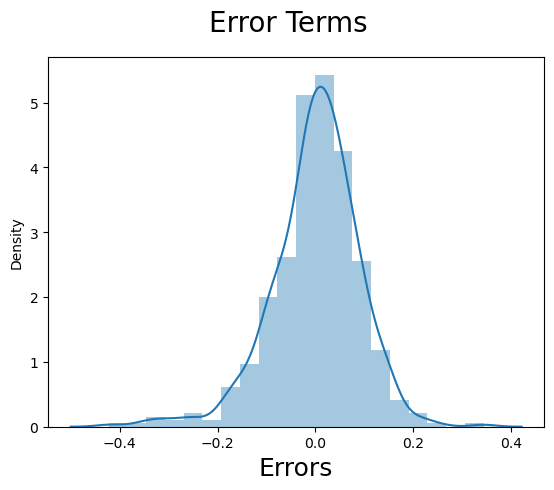

In [627]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

##Multi Colinearity

In [628]:
calculateVIF(X_train_new)

Features    VIF
0            const  58.73
11          spring   4.96
4             temp   3.39
13          winter   3.35
12          summer   2.60
3       workingday   1.87
8              sat   1.77
6              Jul   1.48
7              Sep   1.29
2          holiday   1.16
5        windspeed   1.10
9   Light_snowrain   1.05
10           Misty   1.05
1               yr   1.02

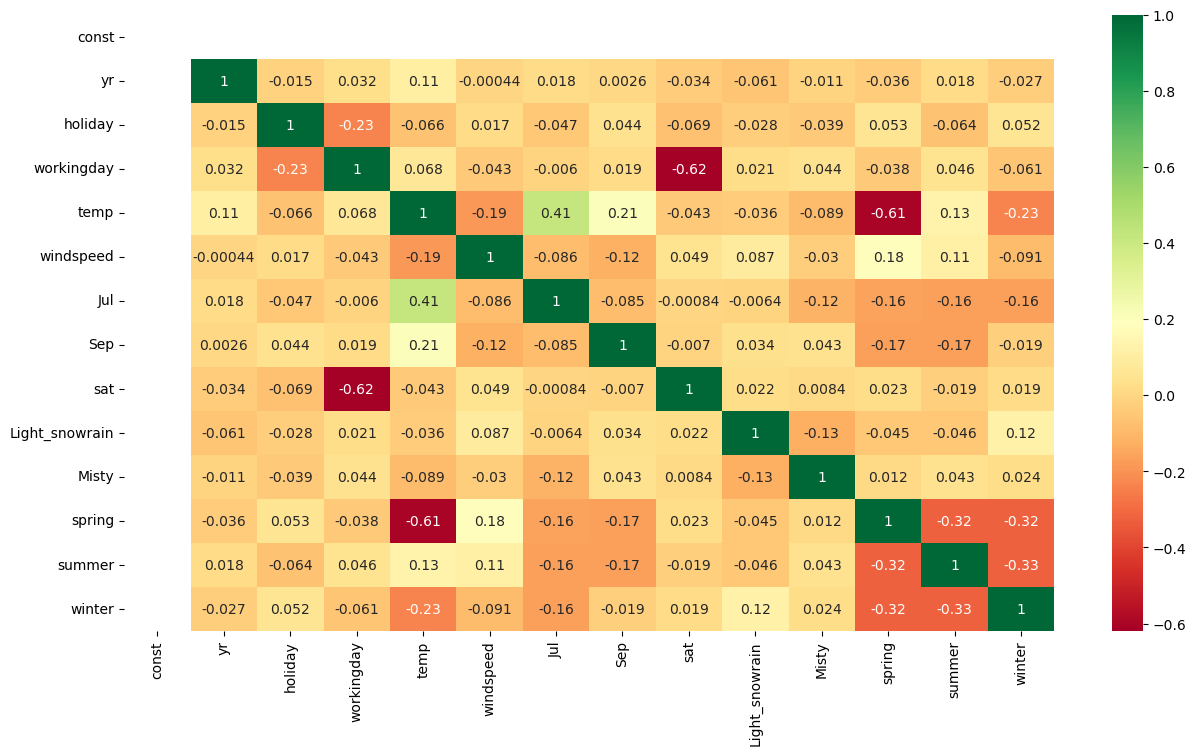

In [629]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

Making Predictions
We would first need to scale the test set as well. So let's start with that.

In [630]:
X_train_new

const  yr  holiday  workingday      temp  windspeed  Jul  Sep  sat  \
576    1.0   1        0           1  0.815169   0.264686    1    0    0   
426    1.0   1        0           0  0.442393   0.255342    0    0    1   
728    1.0   1        0           0  0.245101   0.663106    0    0    0   
482    1.0   1        0           0  0.395666   0.188475    0    0    1   
111    1.0   0        0           1  0.345824   0.380981    0    0    0   
..     ...  ..      ...         ...       ...        ...  ...  ...  ...   
578    1.0   1        0           1  0.863973   0.187140    0    0    0   
53     1.0   0        0           1  0.202618   0.111379    0    0    0   
350    1.0   0        0           0  0.248216   0.431816    0    0    1   
79     1.0   0        0           1  0.462664   0.529881    0    0    0   
520    1.0   1        0           1  0.600225   0.359599    0    0    0   

     Light_snowrain  Misty  spring  summer  winter  
576               0      0       0       0       0  
426               0      1       1       0       0  
728               0      0       1       0       0  
482               0      1       0       1       0  
111               0      1       0       1       0  
..              ...    ...     ...     ...     ...  
578               0      0       0       0       0  
53                0      0       1       0       0  
350               0      1       0       0       1  
79                0      1       0       1       0  
520               0      1       0       1       0  

[510 rows x 14 columns]

In [631]:
# Applying scaling on the test dataset

num_vars = ['temp','atemp','hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219   
535   1        0           1  0.901354  0.842587  0.610133   0.153728   
299   0        0           1  0.511964  0.496145  0.837699   0.334206   
221   0        0           1  0.881625  0.795343  0.437098   0.339570   
152   0        0           1  0.817246  0.741471  0.314298   0.537414   

          cnt  Aug  Dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.692706    0    0  ...    0    0    0    0    0               0      1   
535  0.712034    0    0  ...    0    0    0    0    1               0      0   
299  0.303382    0    0  ...    0    0    1    0    0               0      1   
221  0.547400    1    0  ...    0    0    0    0    1               0      0   
152  0.569029    0    0  ...    0    0    1    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [632]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt         Aug         Dec  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.059091    0.086364  ...    0.118182   
std      0.159584    0.219163    0.236333    0.281541  ...    0.323559   
min     -0.042808    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198843    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402718    0.677750    0.000000    0.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  220.000000  220.000000  220.000000  220.000000      220.000000   
mean     0.145455    0.163636    0.168182    0.100000        0.027273   
std      0.353363    0.370789    0.374881    0.300684        0.163248   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [633]:
y_test = df_test.pop('cnt')
X_test = df_test

In [651]:
col2 = X_train_new.columns

X_test = X_test[col2]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

KeyError: "['const'] not in index"

In [635]:
y_pred = lr_4.predict(X_test_lm_4)

In [636]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8068

Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

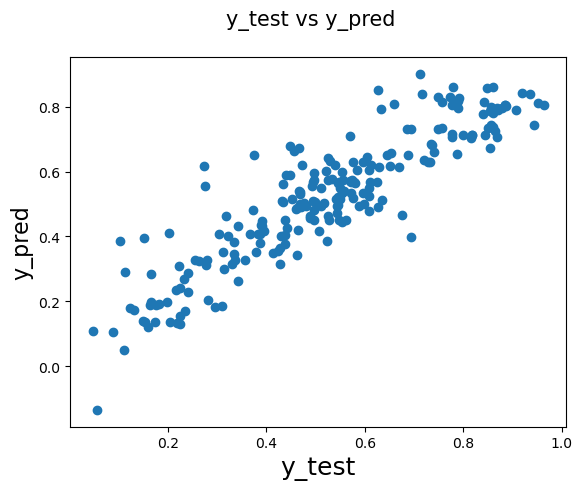

In [637]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [638]:
round(lr_4.params,4)

const             0.1484
yr                0.2342
holiday          -0.0547
workingday        0.0474
temp              0.4789
windspeed        -0.1492
Sep               0.0894
sat               0.0585
Light_snowrain   -0.2904
Misty            -0.0809
spring           -0.0543
summer            0.0625
winter            0.0968
dtype: float64

In [639]:
# r2_score 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8067599927321067

In [646]:

# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7773


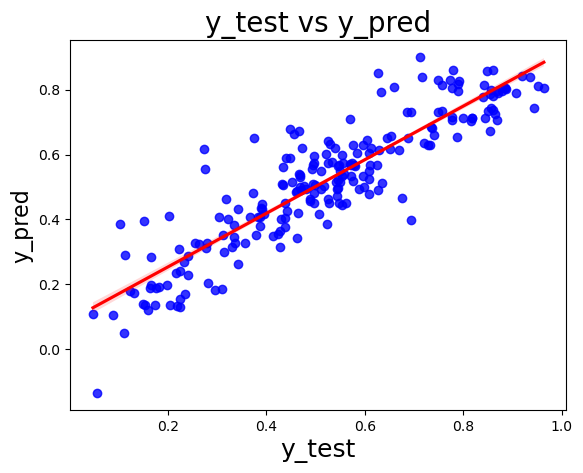

In [640]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.8068
- Train dataset Adjusted R^2 : 0.835   
- Test dataset Adjusted R^2  : 0.7773

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.